# Titanic Dataset Using TPOT
**By: Amr Ezzat**

## IMPORT RESOURCES

In [9]:
import tpot
import xgboost 
from tpot import  TPOTClassifier

# Importing ML Packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from __future__ import print_function

# Load EDA packages
import pandas as pd
import numpy as np

In [10]:
# Fetching dataset 
td = pd.read_csv('/Users/home/Documents/Downloads/titanic.csv', engine ='python')

In [11]:
td.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [12]:
# Checking Number of columns and rows are correct
print ("Rows     : " ,td.shape[0])
print ("Columns  : " ,td.shape[1])

Rows     :  887
Columns  :  8


In [13]:
# Check the data type of variables (Only Numerical values are accepted by TPOT)
td.dtypes

Survived                     int64
Pclass                       int64
Name                        object
Sex                         object
Age                        float64
Siblings/Spouses Aboard      int64
Parents/Children Aboard      int64
Fare                       float64
dtype: object

## DATA PREPARATION

In [14]:
# Coverting catigorical values

sex=td.columns[3]
sex_mapper = {'male': 0, 'female': 1}

td[sex].replace(sex_mapper, inplace= True)

In [15]:
# Course and Grade data type changed successfully. 
td.dtypes

Survived                     int64
Pclass                       int64
Name                        object
Sex                          int64
Age                        float64
Siblings/Spouses Aboard      int64
Parents/Children Aboard      int64
Fare                       float64
dtype: object

In [16]:
td

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,0,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,1,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,1,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,1,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,0,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,0,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,1,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,1,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,0,26.0,0,0,30.0000


In [17]:
# Checking for missing data
td.isnull().sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

In [18]:
# Arrange data (Remove 'Name' and 'Survived', set 'Survived' as the value we want to predict)
X = td.drop("Survived", axis=1)
X = X.drop("Name", axis=1)
y = td['Survived']

## TRAIN TEST SPLIT

In [19]:
# Splitting data 80% training data 20% test data
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, test_size=0.2)

In [20]:
# Checking the split was done properly
X_train

,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
547,1,0,17.0,0,2,110.8833
678,1,0,27.0,0,0,76.7292
541,1,0,50.0,1,0,106.4250
857,2,0,21.0,1,0,11.5000
873,3,0,19.0,0,0,7.8958
...,...,...,...,...,...,...
422,3,0,54.0,0,0,7.2500
484,1,0,58.0,0,0,29.7000
355,2,1,38.0,0,0,13.0000
273,1,1,63.0,1,0,77.9583


## TPOT

In [21]:
tpot =  TPOTClassifier(max_time_mins = 30, verbosity=2, random_state = 45, scoring='accuracy')
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))


Generation 1 - Current best internal CV score: 0.8223154530016981

Generation 2 - Current best internal CV score: 0.8265507941264609

Generation 3 - Current best internal CV score: 0.8293377284986514

Generation 4 - Current best internal CV score: 0.8293377284986514

Generation 5 - Current best internal CV score: 0.8293377284986514

Generation 6 - Current best internal CV score: 0.8307361901907901

Generation 7 - Current best internal CV score: 0.8307361901907901

Generation 8 - Current best internal CV score: 0.8335331135750674

Generation 9 - Current best internal CV score: 0.8335331135750674

Generation 10 - Current best internal CV score: 0.8335331135750674

Generation 11 - Current best internal CV score: 0.8335331135750674

Generation 12 - Current best internal CV score: 0.8349615423034662

Generation 13 - Current best internal CV score: 0.8349615423034662

Generation 14 - Current best internal CV score: 0.8363400259714314

Generation 15 - Current best internal CV score: 0.836340

In [22]:
# Evaluating the model on the test set calling the score function  
print(tpot.score(X_test, y_test))

0.8595505617977528


In [23]:
tpot.fitted_pipeline_

Pipeline(steps=[('gradientboostingclassifier',
                 GradientBoostingClassifier(max_depth=6,
                                            max_features=0.9500000000000001,
                                            min_samples_leaf=19,
                                            min_samples_split=15,
                                            random_state=45, subsample=0.8))])

## VISUAL RESULT 

In [24]:
exctracted_best_model = tpot.fitted_pipeline_.steps[-1][1]

In [25]:
exctracted_best_model.fit(X_train, y_train) 

GradientBoostingClassifier(max_depth=6, max_features=0.9500000000000001,
                           min_samples_leaf=19, min_samples_split=15,
                           random_state=45, subsample=0.8)

In [26]:
# Getting feature importance 
arr = exctracted_best_model.feature_importances_
arr

array([0.12686668, 0.34714518, 0.2402255 , 0.03795396, 0.01389692,
       0.23391176])

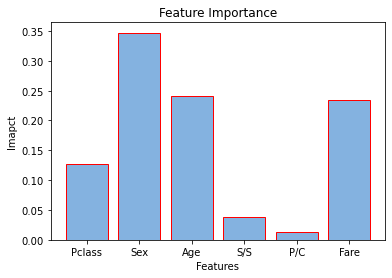

In [27]:
# Print feature importance using matpotlib
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
 
# Create dataset
height = arr
bars = ('Pclass', 'Sex', 'Age', 'S/S', 'P/C', 'Fare')
x_pos = np.arange(len(bars))
 
# Create bars and choose color
plt.bar(x_pos, height, color = (0.2, 0.5, 0.8, 0.6), edgecolor='red')
 
# Add title and axis names
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Imapct')
 
# Create names on the x axis
plt.xticks(x_pos, bars)
 
# Show graph
plt.show()

In [28]:
# Export Python Code
tpot.export('tpot_titanic_pipeline.py')